## Section 1: Business Understanding

### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score

Reviews, including unique id for each reviewer and detailed comments

Calendar, including listing id and the price and availability for that day


### Question 1: Which month has the highest average listing price and listing total?

### Question 2: Which neighborhood has the highest average listing price and listing total?

### Question 3: How many new hosts are there in each year before 2016?

### Question 4: Does superhosts have higher average ratings?


## Section 2: Data Understanding

In [61]:
# import libraries
import calendar as cal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

### Gather

In [62]:
calendar = pd.read_csv('data/calendar.csv', parse_dates=['date'])
listings = pd.read_csv('data/listings.csv')

In [63]:
# Take a sneak peek into the calendar data
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [64]:
# Number of unique days
calendar['date'].nunique()

365

In [65]:
# Take a sneak peek into the calendar data
print(listings.shape)
print(listings.columns)
listings.head()

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Section 3: Prepare Data

### Clean

In [66]:
# Q1 
# Extract month from date
calendar['month'] = calendar['date'].dt.month
# Drop NA's in listing price to get rows with valid price info
calendar = calendar.dropna(subset=['price'])
# Convert price to float
calendar['price'] = calendar['price'].str.replace('[$,]', '', regex=True).astype(float)

# Q2 
listings_neigh = listings[['id', 'neighbourhood', 'neighbourhood_cleansed']].copy()
# Check number of unique values in neighbourhood_cleansed and neighbourhood columns
print(listings_neigh['neighbourhood_cleansed'].nunique())
print(listings_neigh['neighbourhood'].nunique())

# Q3 Q4
hosts_df_raw = listings[['id', 'host_id', 'host_since', 'host_is_superhost', 
       'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].copy()


87
81


In [67]:
def clean_host_data(hosts_df):
    '''
        Clean the hosts data:
            Drop NA is the data, convert data to proper format and extract extra fields
        Input:
            hosts_df - The raw host dataframe
        Output:
            hosts_df - The processed dataframe ready for further analysis
    '''

    print(hosts_df['host_is_superhost'].isna().sum())
    # Drop NA values, since these rows won't be useful for our analysis
    hosts_df = hosts_df.dropna(subset=['host_is_superhost', 'host_since', 'review_scores_rating'])
    # Take listings have over 5 reviews
    hosts_df = hosts_df[hosts_df['number_of_reviews'] >= 5]
    # Transform boolean variable
    hosts_df['host_is_superhost'] = np.where(hosts_df['host_is_superhost']=='t', True, False)

    # Extract year and month 
    hosts_df['host_since'] = pd.to_datetime(hosts_df['host_since'])
    hosts_df['year'] = hosts_df['host_since'].dt.year
    hosts_df['month'] = hosts_df['host_since'].dt.month
    return hosts_df

host_df = clean_host_data(hosts_df_raw)

2


## Section 4: Evaluate Results

### Question 1: Which month has the highest average listing price and listing total?

### Analyze

In [17]:
# calculate average price by month
average_price = calendar['price'].mean()
price_avg = calendar.groupby('month')['price'].agg(['mean', 'count']).reset_index()
average_listing = price_avg['count'].mean()
price_avg.head()

,month,mean,count
0,1,122.912176,64937
1,2,124.293927,73321
2,3,128.644488,83938
3,4,135.097005,76037
4,5,139.538183,79971


### Visualize

Text(0.5, 1.0, 'Average monthly listing price')

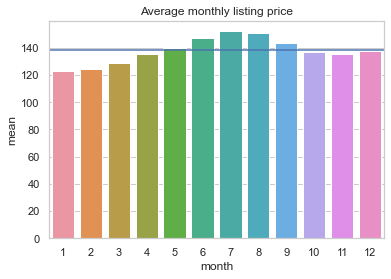

In [19]:
sns.barplot(x='month', y='mean', data=price_avg).axhline(average_price)
plt.title('Average monthly listing price')

As we can see from the graph, the average listing price is highest from May to September and slowly tapers from fall to spring.

Text(0.5, 1.0, 'Average monthly total avaialble listings')

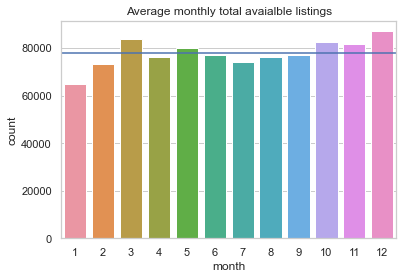

In [20]:
sns.barplot(x='month', y='count', data=price_avg).axhline(average_listing)
plt.title('Average monthly total avaialble listings')

According to the second graph, which is the average number of listing in each month, the higher price in the summer might also be caused by a lower supply since the listings number during summer is just about average.

__Answer__:  From the graphs, we can identify that July is month when the mean listing price is the highest, Decembers have the most available listings.

### Question 2: Which neighborhood has the highest average listing price and listing total?

### Analyze

In [22]:
# Calculate the mean listing price for each listing
price_avg = calendar.groupby('listing_id')['price'].agg('mean').reset_index()
price_avg.head()

,listing_id,price
0,3335,120.000000
1,4291,82.000000
2,5682,53.944984
3,6606,92.849315
4,7369,85.000000


In [23]:
# Join back the listing price with the main listing dataframe
price_neigh = listings_neigh.merge(price_avg, left_on='id', right_on='listing_id')
price_neigh.head()

,id,neighbourhood,neighbourhood_cleansed,listing_id,price
0,241032,Queen Anne,West Queen Anne,241032,85.000000
1,953595,Queen Anne,West Queen Anne,953595,170.931271
2,3308979,Queen Anne,West Queen Anne,3308979,1301.818182
3,7421966,Queen Anne,West Queen Anne,7421966,100.000000
4,278830,Queen Anne,West Queen Anne,278830,462.739726


In [24]:
#Group by neighbourhood_cleansed and calculate the mean and count
avg_price_neigh = price_neigh.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'count']).reset_index()
avg_price_neigh.head()

,neighbourhood_cleansed,mean,count
0,Adams,125.504949,70
1,Alki,187.794611,40
2,Arbor Heights,129.639879,5
3,Atlantic,114.110759,52
4,Belltown,190.391763,226


### Visualize

Text(0.5, 1.0, 'Top 10 most expensive neighborhood')

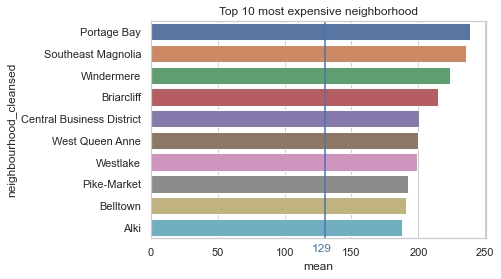

In [42]:
# Calculate the mean for all the listings prices
mean_price = avg_price_neigh['mean'].mean()
avg_price_neigh_top10 = avg_price_neigh.sort_values('mean', ascending=False).iloc[:10, ]
sns.barplot(x='mean', y='neighbourhood_cleansed', data=avg_price_neigh_top10, orient='h').axvline(mean_price)
plt.text(mean_price-10, 10.1, int(mean_price), color='b')
plt.title('Top 10 most expensive neighborhood')

As observed in the graph, the average listing price is around 129 dollars and the top 10 neighborhoods are all above the average, the maximum average price is around 240 dollars.


Text(0.5, 1.0, 'Distribution for average price by neighborhood')

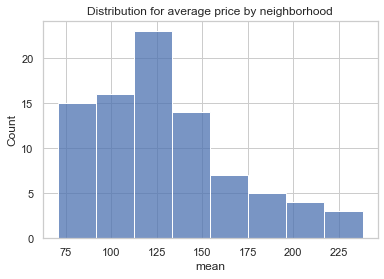

In [49]:
sns.histplot(x='mean', data=avg_price_neigh)
plt.title('Distribution for average price by neighborhood')

The listing prices range from 75 - 240 USD, and have a right skew distribution.


Text(0.5, 1.0, 'Top 10 most listings neighborhood')

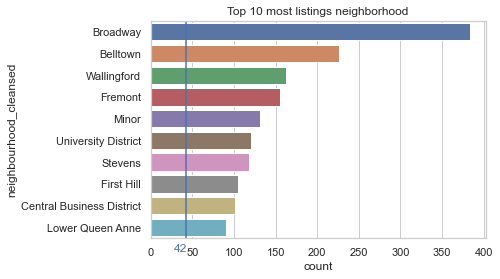

In [44]:
# Calculate the average listing number for each neighborhood
mean_count = avg_price_neigh['count'].mean()
count_neigh_top10 = avg_price_neigh.sort_values('count', ascending=False).iloc[:10, ]
sns.barplot(x='count', y='neighbourhood_cleansed', data=count_neigh_top10, orient='h').axvline(mean_count)
plt.text(mean_count-15, 10.1, int(mean_count), color='b')
plt.title('Top 10 most listings neighborhood')

The top 10 neighborhoods for average listing numbers, have listing numbers well above the averge which is around 42. The maximum number of listings is around 400.


Text(0.5, 1.0, 'Distribution for average number of listings by neighborhood')

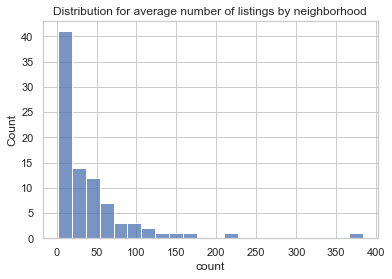

In [50]:
sns.histplot(x='count', data=avg_price_neigh)
plt.title('Distribution for average number of listings by neighborhood')

The distribution for average listing numbers across different neighborhoods also have a right screwed distribution and have outliers that have near 400 listings.


According to the above histograms, we can see that the average listing counts have a much more skewed distribution thane average price. Moreover, we can observe that the top 10 neighborhoods with most expensive average listing price have no common neighbood with the top 10 neighhoods that have the most listings.

__Answer:__ Portage Bay has highest average listing price, whic is around 240 USD, and Broadway has the highest number of average listing.

### Question 3: How many new hosts are there in each year before 2016?

### Analyze

In [ ]:
listing_by_year = hosts_df.groupby('year')['id'].count()

### Visualize

Text(0.5, 1.0, 'New listings by year')

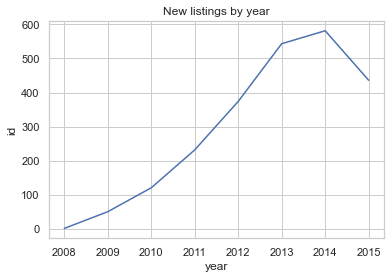

In [51]:
sns.lineplot(data=listing_by_year)
plt.title('New listings by year')

__Answer__: From the above graph, we can see that number of new listings are increasing at a healthy pace from 2008 to 2014, peaking at around 600 new listings in 2014. However, we can the there is a slowdown from 2013 to 2014 in new listings a sizeable drop in 2015, suggesting that the market maybe is close to being saturated. 

### Question 4: Does superhosts have higher average ratings?

### Analyze

In [ ]:
superhost_df = hosts_df.groupby('host_is_superhost')[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].mean()

### Visualize

<AxesSubplot:xlabel='host_is_superhost', ylabel='Rating'>

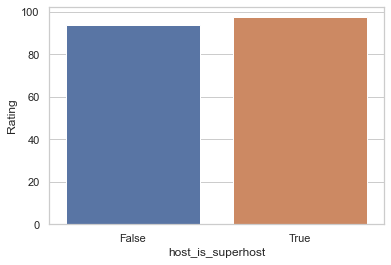

In [218]:
superhost_df.columns = [col.split('_')[-1].capitalize() for col in superhost_df.columns]
sns.barplot(x=superhost_df.index, y=superhost_df['Rating'])

From the graph, we can see that the superhost does have a higher average rating, but not significantly than non-superhosts.

Text(0.5, 1.0, 'Ratings Breakdown')

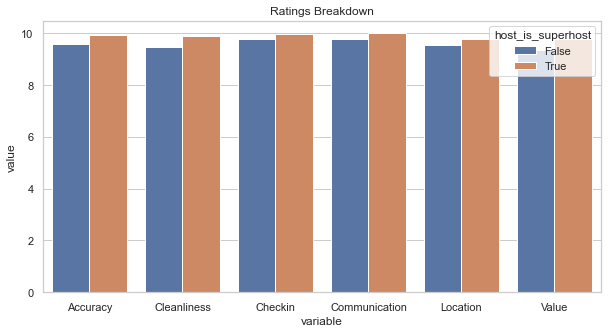

In [220]:
# Drop total rating column
rating_breakdown = superhost_df.drop('Rating', axis=1)
temp = rating_breakdown.reset_index().melt(id_vars='host_is_superhost')
plt.figure(figsize=(10, 5))
sns.barplot(x='variable', y='value', hue='host_is_superhost', data=temp)
plt.title('Ratings Breakdown')

From the second graph, which is a detailed breakdown of the ratings into 6 sub-categories. In here we can see that the superhosts have higher ratings in all of the sub-categories, which attests that they might offer best service to customers. However, the gap between the superhosts and non-superhosts are relatively narrow, which means that if the non-superhosts improve their service a bit, they could still be eligible to become a superhost.

__Answer:__ Superhosts do have higher ratings across every aspect of the rating system.